<a href="https://colab.research.google.com/github/applepieiris/keyframes_extract_tool/blob/master/fiftyone_explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall opencv_python_headless

!pip install opencv-python-headless==4.5.4.60

!pip install fiftyone

# sample from the official website <https://voxel51.com/docs/fiftyone/tutorials/uniqueness.html>

In [2]:
import fiftyone as fo
import fiftyone.zoo as foz

# Load the CIFAR-10 test split
# Downloads the dataset from the web if necessary
dataset = foz.load_zoo_dataset("cifar10", split="test")

 100% |█████████████| 10000/10000 [5.6s elapsed, 0s remaining, 1.8K samples/s]      
Dataset info written to '/root/fiftyone/cifar10/info.json'
Loading 'cifar10' split 'test'
 100% |█████████████| 10000/10000 [7.2s elapsed, 0s remaining, 1.4K samples/s]      
Dataset 'cifar10-test' created


In [ ]:
dataset.first()

In [ ]:
session = fo.launch_app(dataset)

In [ ]:
import fiftyone.brain as fob

fob.compute_uniqueness(dataset)

In [ ]:
# Sort in increasing order of uniqueness (least unique first)
dups_view = dataset.sort_by("uniqueness")

# Open view in the App
session.view = dups_view

读取video类型的数据

In [19]:
dataset = fo.Dataset.from_videos_dir('./videos/')

 100% |█████████████████████| 2/2 [18.7ms elapsed, 0s remaining, 106.7 samples/s]   


In [23]:
! rm -r ./videos/2
! rm -r ./videos/1

In [24]:
# Convert videos to images, sample 1 frame per second
frame_view = dataset.to_frames(sample_frames=True, fps=1)

Sampling video frames...
 100% |█████████████████████| 2/2 [11.4s elapsed, 0s remaining, 0.2 samples/s]  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


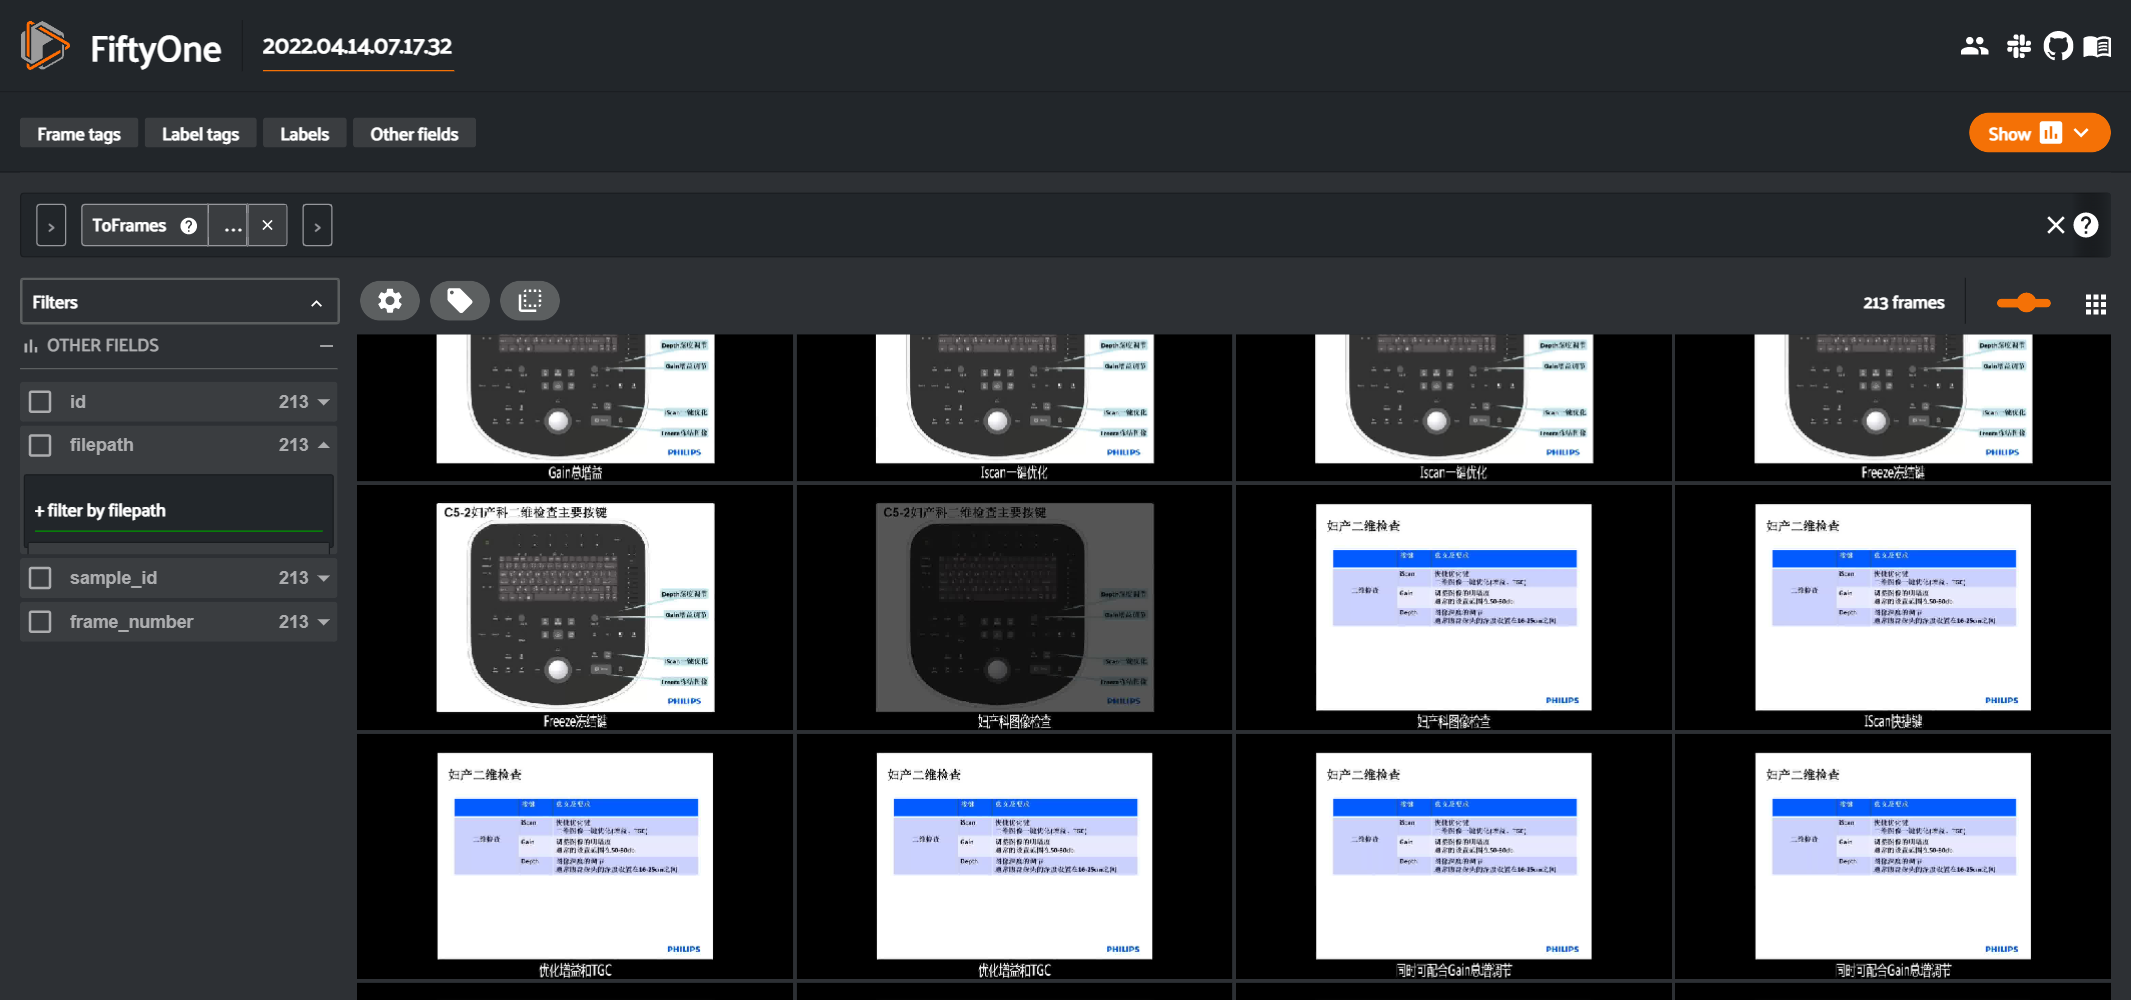

<IPython.core.display.Javascript object>

In [30]:
# Visualize in the App
session = fo.launch_app(frame_view)

In [ ]:
# Index images by similarity
results = fob.compute_similarity(frame_view, brain_key="frame_sim")

# Find maximally unique frames
num_unique = 50 # Scale this to whatever you want
results.find_unique(num_unique)
unique_view = frame_view.select(results.unique_ids)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


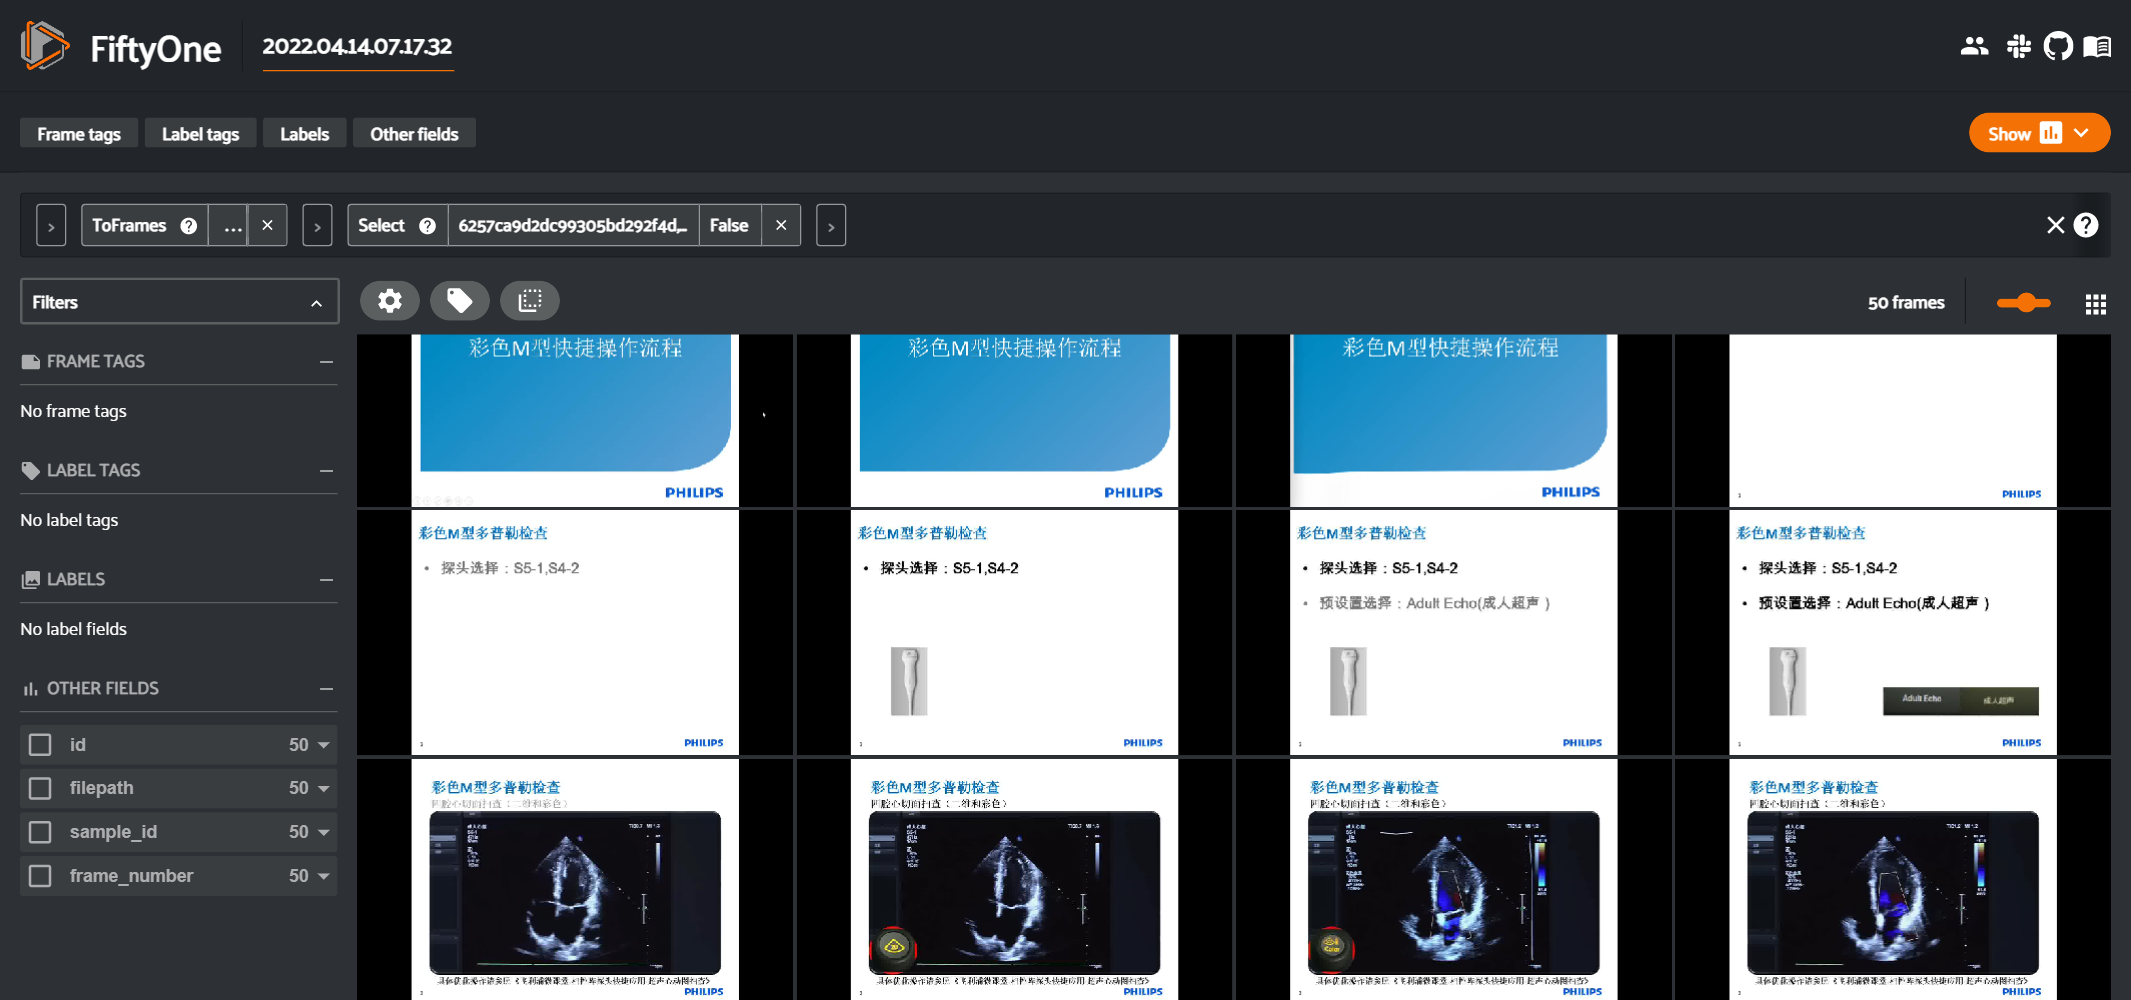

<IPython.core.display.Javascript object>

In [29]:
session.view = unique_view